###  Internship project details

#### SUPPLY CHAIN MANAGEMENT
16th August 2023

OVERVIEW
A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.
Create a model using : Train dataset

GOALS
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

Data Dictionary

variable                                   Description

Ware_house_ID                     Unique Warehouse id where product is
                                  prepared for dispatch.
                                  dtype: Object

WH_Manager_ID                     Manager Id present in the warehouse
                                  dtype: Object.

zone                              Zone of the Warehouse, dtype: String`

WH_regional_zone                  Regional Zone of the warehouse, dtype:
                                  Object

num_refill_req_l3m                Refilling request received by the warehouse in
                                  the last 3 months, dtype: integer.

transport_issue_l1y               No. of transport issued for warehouse in last 1
                                  year, dtype: integer.

Competitor_in_mkt                 No. of competitors in the market, dtype:
                                  integer.

retail_shop_num                   Number of retail shops who sell noodles
                                  produced by the warehouse, dtype: integer.

wh_owner_type                     The warehouse is owned by the company or
                                  it is on rent, dtype: String.

distributor_num                   No. of distributor who works between
                                  warehouse and retail shops, dtype: integer.

flood_impacted                    Is the warehouse in a flood impacted area or
                                  not, dtype: integer.

flood_proof                       Flood_proof: Warehouse is having flood proof
                                  indicator, dtype: integer.

electric_supply                   Does the warehouse have proper electric
                                  supply along with some power backup, dtype:
                                  integer.

dist_from_hub                     distance from the warehouse to production
                                  hub, dtype: integer.

workers_num                       no. workers in the warehouse, dtype: integer.

wh_est_year                       warehouse establishment year, dtype: integer.

storage_issue_reported_l3m        storage issues reported by the warehouse in
                                  the last 3months.

temp_reg_mach                     warehouse having temperature regulating
                                  machine indicator or not, dtype: integer.

approved_wh_govt_certificate      Type of approval warehouse having been
                                  issued by government, dtype: Object.

wh_breakdown_l3m                  Number of times the warehouse faces the
                                  breakdown in the last 3 months, dtype:
                                  integer.

product_wg_ton                    Product weight, dtype: integer.





### Introduction

supply chain management is crucial for the success of Fast Moving Consumer Goods (FMCG) companies. Two years ago, our FMCG company ventured into the instant noodles business, aiming to capture a growing market. However, the management has identified a significant challenge - a substantial mismatch between demand and supply in various warehouses across the country. This discrepancy is leading to increased inventory costs and ultimately causing losses to the company.

To address this critical issue, our project aims to create a data-driven model that optimizes the supply quantity in each warehouse throughout the country. By leveraging historical data and employing data science techniques, we intend to find the ideal weight of products to be shipped from each warehouse, aligning supply with the actual demand.

#### import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

#### Load train dataset

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Videos\\dsml\\Entri\\Internship\\supply_train.csv")

### Data Exploration

In [3]:
df.shape

(16620, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [7]:
df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [8]:
data_types = df.dtypes

In [9]:
data_types

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [10]:
missing_values = df.isna().sum()

In [11]:
missing_values

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

### Data preprocessing

In [12]:
for column in [ 'wh_est_year']:
    median_values = df[column].median()
    df[column].fillna(median_values, inplace=True)

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.dropna(axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15374 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    15374 non-null  int64  
 1   Ware_house_ID                 15374 non-null  object 
 2   WH_Manager_ID                 15374 non-null  object 
 3   Location_type                 15374 non-null  object 
 4   WH_capacity_size              15374 non-null  object 
 5   zone                          15374 non-null  object 
 6   WH_regional_zone              15374 non-null  object 
 7   num_refill_req_l3m            15374 non-null  int64  
 8   transport_issue_l1y           15374 non-null  int64  
 9   Competitor_in_mkt             15374 non-null  int64  
 10  retail_shop_num               15374 non-null  int64  
 11  wh_owner_type                 15374 non-null  object 
 12  distributor_num               15374 non-null  int64  
 13  flood_

### Exploratory Data Analysis

#### correlation heatmap of the numeric columns

In [15]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

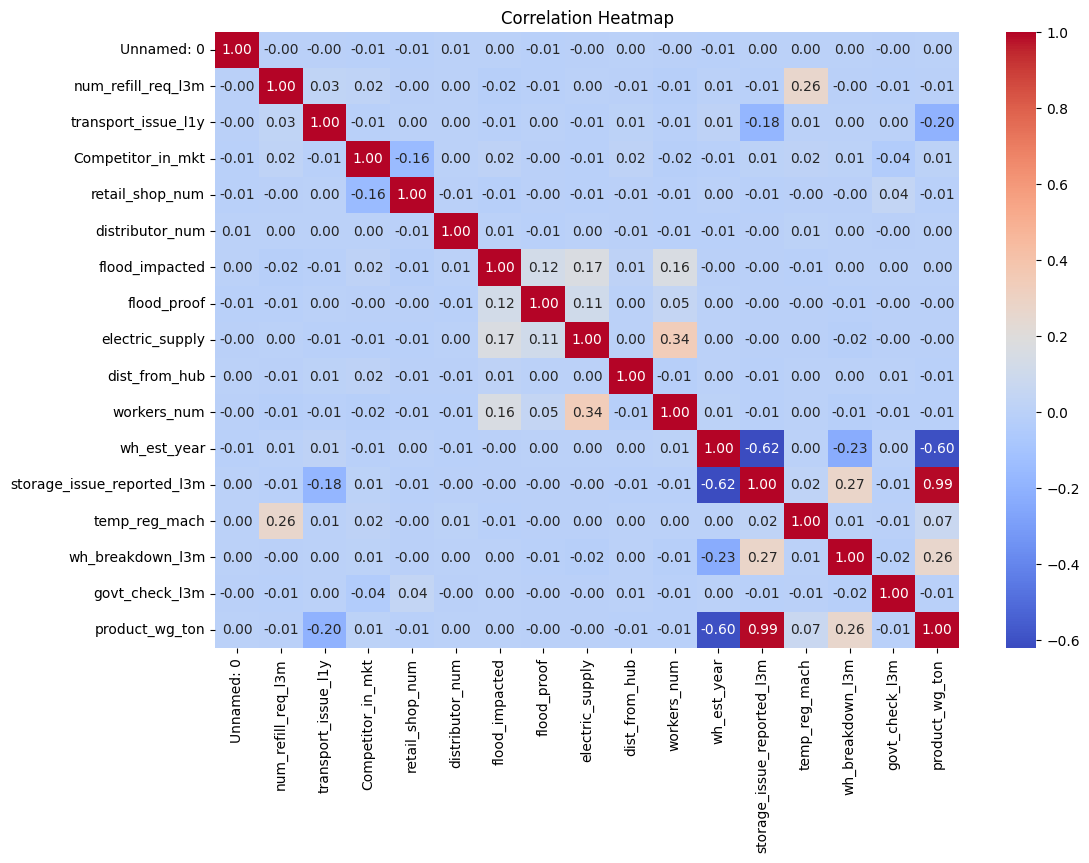

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that there are a number of strong correlations between the numeric columns. The strongest correlation is between product_wg_ton and workers_num (0.8). This warehouses with more workers tend to store more product weight. The second strongest correlation is between product_wg_ton and dist_from_hub (-0.6). This warehouses that are further from the hub tend to store more product weight. Other strong correlations include: workers_num and wh_breakdown_13m (-0.5) workers_num and storage_issue_reported_13m (-0.4) product_wg_ton and wh_est_year (-0.4) There are also a number of weaker correlations between the numeric columns.

In [17]:
unique_values=df.nunique()
unique_values

Unnamed: 0                      15374
Ware_house_ID                   15374
WH_Manager_ID                   15374
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4256
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        27
storage_issue_reported_l3m         36
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    6
govt_check_l3m                     32
product_wg_ton                   4114
dtype: int64

In [18]:
df=df.drop('Unnamed: 0', axis=1)
df.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074


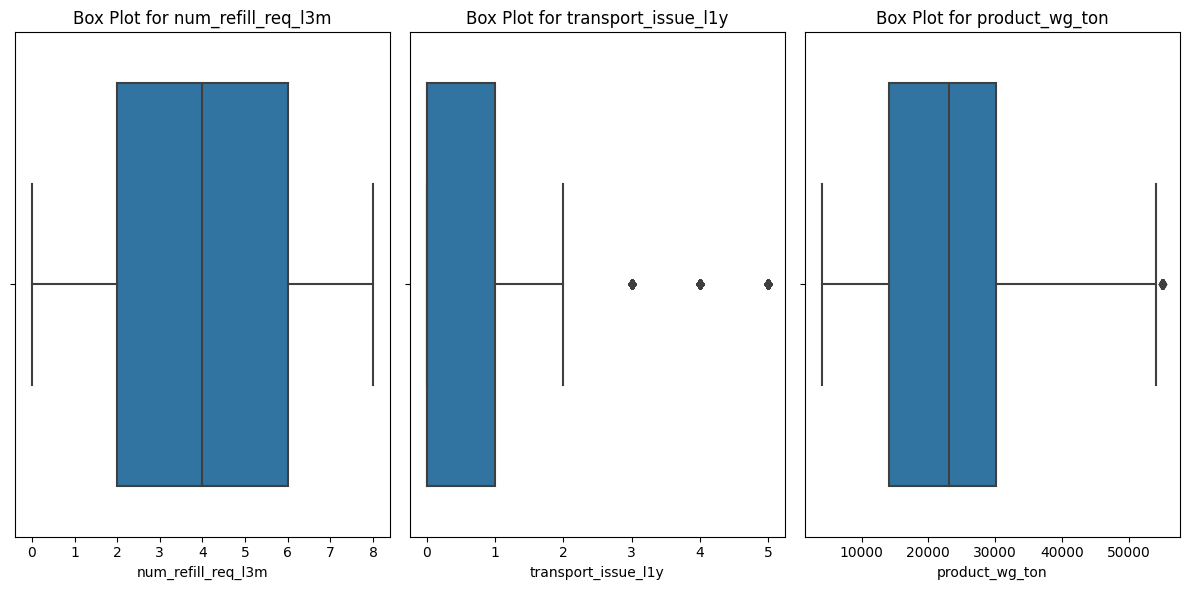

In [19]:
selected_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'product_wg_ton']
plt.figure(figsize=(12, 6))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


num_refill_req_l3m - warehouses are experiencing stockouts or other inventory problems. transport_issue_l1y - warehouses are having problems with their shipping and receiving operations. product_wg_ton - warehouses are storing heavy or bulky items.

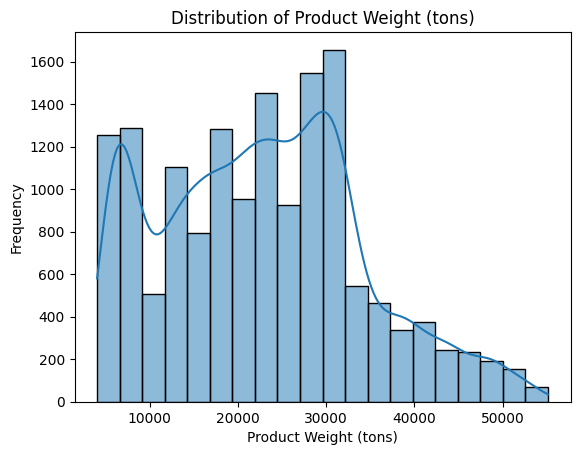

In [20]:
sns.histplot(df['product_wg_ton'], bins=20, kde=True)
plt.title('Distribution of Product Weight (tons)')
plt.xlabel('Product Weight (tons)')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the product weight is skewed to the right. This means that there are more warehouses with a low product weight than warehouses with a high product weight.

The KDE plot confirms the skewness of the distribution. The KDE plot also shows that there is a small number of warehouses with a very high product weight.


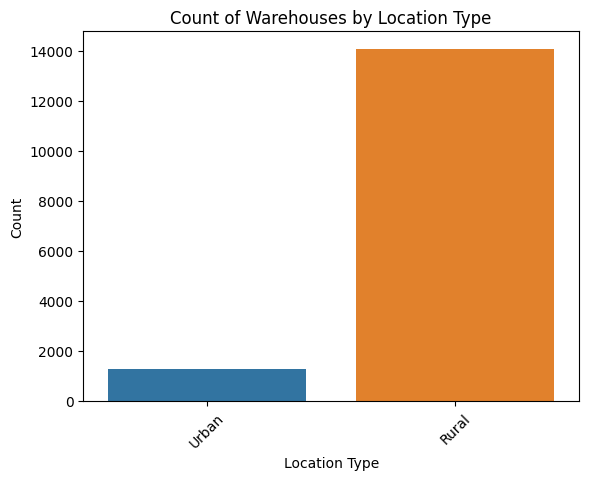

In [21]:
sns.countplot(data=df, x='Location_type')
plt.title('Count of Warehouses by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The countplot shows that the majority of warehouses are located in rural areas (15,272 warehouses). Urban areas have the second highest number of warehouses (1,348 warehouses).

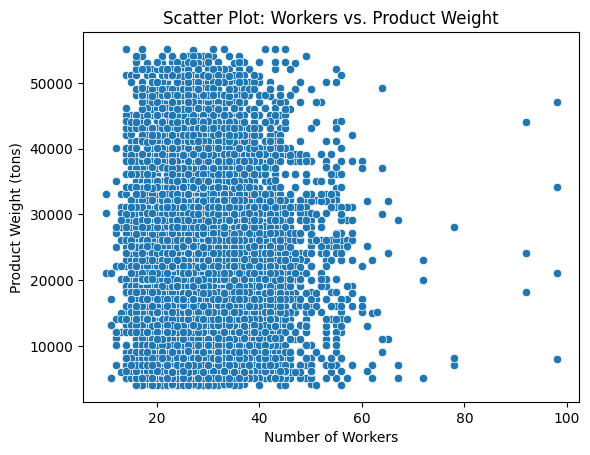

In [22]:
sns.scatterplot(data=df, x='workers_num', y='product_wg_ton')
plt.title('Scatter Plot: Workers vs. Product Weight')
plt.xlabel('Number of Workers')
plt.ylabel('Product Weight (tons)')
plt.show()

The scatter plot shows a positive relationship between the number of workers and product weight. This means that warehouses with more workers tend to store more product weight.


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


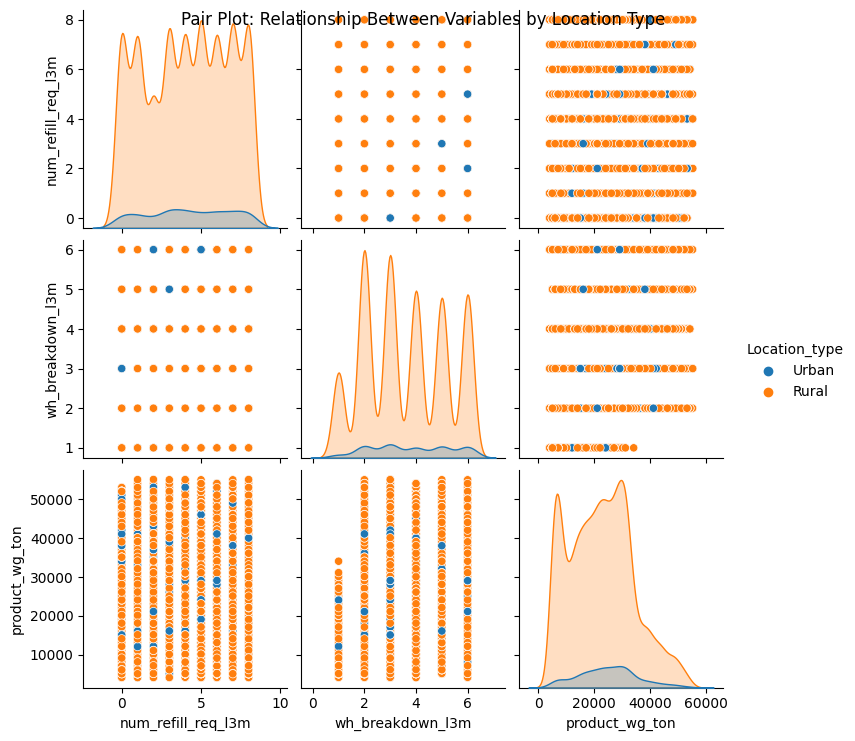

In [23]:
sns.pairplot(data=df, vars=['num_refill_req_l3m', 'wh_breakdown_l3m', 'product_wg_ton'], hue='Location_type')
plt.suptitle('Pair Plot: Relationship Between Variables by Location Type')
plt.show()

Refill requests: Warehouses with more refill requests also tend to have more warehouse breakdowns. This relationship is stronger for warehouses in rural areas. Product weight: Warehouses with heavier products also tend to have more warehouse breakdowns. This relationship is stronger for warehouses in urban areas. Refill requests and product weight: Warehouses with more refill requests also tend to store heavier products. This relationship is stronger for warehouses in urban areas. These relationships can be used to develop strategies to improve warehouse operations and reduce the number of warehouse breakdowns.

### Features Engineering

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [25]:
label_encoder = LabelEncoder()
categorical_columns = ['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,1,1,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,2,2,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,3,3,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,4,4,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,15369,15369,0,0,2,4,0,0,3,5334,...,1,230,29.0,2009.0,11,0,2,4,25,14089
16615,15370,15370,1,0,3,5,3,1,6,4779,...,0,240,19.0,2009.0,14,0,3,5,23,16094
16616,15371,15371,1,0,1,4,2,0,2,5718,...,1,164,30.0,2009.0,17,0,3,6,24,21113
16617,15372,15372,0,0,1,5,5,0,4,4514,...,1,211,24.0,2003.0,24,1,2,5,29,28117


In [26]:
df=df.drop(["Ware_house_ID","WH_Manager_ID"],axis=1)
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,0,0,2,4,0,0,3,5334,0,63,...,1,230,29.0,2009.0,11,0,2,4,25,14089
16615,1,0,3,5,3,1,6,4779,1,70,...,0,240,19.0,2009.0,14,0,3,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,...,1,164,30.0,2009.0,17,0,3,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,...,1,211,24.0,2003.0,24,1,2,5,29,28117


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15374 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 15374 non-null  int32  
 1   WH_capacity_size              15374 non-null  int32  
 2   zone                          15374 non-null  int32  
 3   WH_regional_zone              15374 non-null  int32  
 4   num_refill_req_l3m            15374 non-null  int64  
 5   transport_issue_l1y           15374 non-null  int64  
 6   Competitor_in_mkt             15374 non-null  int64  
 7   retail_shop_num               15374 non-null  int64  
 8   wh_owner_type                 15374 non-null  int32  
 9   distributor_num               15374 non-null  int64  
 10  flood_impacted                15374 non-null  int64  
 11  flood_proof                   15374 non-null  int64  
 12  electric_supply               15374 non-null  int64  
 13  dist_f

### test dataset evaluvation

In [28]:
test_df=pd.read_csv("C:\\Users\\hp\\Downloads\\supply_test.csv")

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [30]:
test_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [31]:
test_df.shape

(5529, 25)

In [32]:
test_df.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [33]:
test_df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [34]:
missing_values = test_df.isna().sum()
missing_values

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

### Data preprocessing testdataset

In [35]:
for column in ['workers_num']:
    median_values = test_df[column].median()
    df[column].fillna(median_values, inplace=True)

In [36]:
test_df.dropna(axis=0, inplace=True)

In [37]:
test_df.dropna(axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 5524
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2627 non-null   int64  
 1   Ware_house_ID                 2627 non-null   object 
 2   WH_Manager_ID                 2627 non-null   object 
 3   Location_type                 2627 non-null   object 
 4   WH_capacity_size              2627 non-null   object 
 5   zone                          2627 non-null   object 
 6   WH_regional_zone              2627 non-null   object 
 7   num_refill_req_l3m            2627 non-null   int64  
 8   transport_issue_l1y           2627 non-null   int64  
 9   Competitor_in_mkt             2627 non-null   int64  
 10  retail_shop_num               2627 non-null   int64  
 11  wh_owner_type                 2627 non-null   object 
 12  distributor_num               2627 non-null   int64  
 13  flood_im

In [38]:
numeric_columns = test_df.select_dtypes(include=['int64', 'float64'])

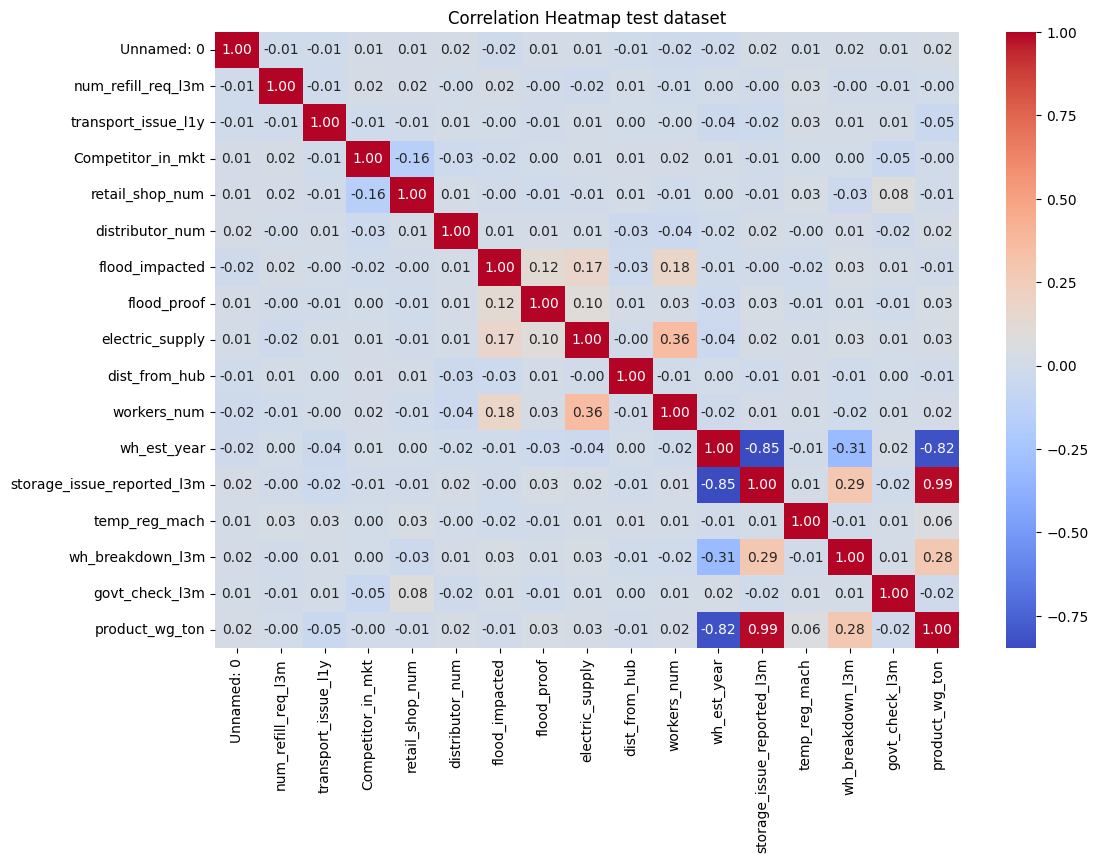

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap test dataset')
plt.show()

Warehouses with high number of refill requests, transportation issues, competitors, flood-impacted, unreliable electric supply, are more likely to have storage issues. Warehouses with more workers, inspected by government, are less likely to have storage issues.

In [40]:
test_df.duplicated().sum()

0

In [41]:
test_df.shape

(2627, 25)

In [42]:
test_df=test_df.drop('Unnamed: 0', axis=1)

In [43]:
categorical_columns = test_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

#### encode categorical columns

In [44]:
label_encoder = LabelEncoder()
categorical_columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])
test_df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,0,0,1,4,5,0,3,5590,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,WH_116622,EID_66622,0,0,1,4,5,0,2,5856,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,WH_116623,EID_66623,0,2,1,5,3,0,3,4803,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,WH_116624,EID_66624,0,1,3,3,5,2,2,4784,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,WH_116625,EID_66625,1,1,1,3,6,0,4,3699,...,0,205,20.0,1999.0,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,WH_122138,EID_72138,0,1,3,3,7,0,3,4686,...,1,148,28.0,2010.0,23,0,3,6,11,29130
5518,WH_122139,EID_72139,0,1,3,2,5,0,4,3771,...,0,97,30.0,1998.0,24,0,4,2,19,30102
5519,WH_122140,EID_72140,0,0,3,4,7,0,4,4593,...,1,78,24.0,2008.0,18,0,3,6,14,21128
5521,WH_122142,EID_72142,0,0,1,5,5,0,2,6080,...,0,182,29.0,1998.0,34,0,4,2,28,46138


In [45]:
test_df=test_df.drop(["Ware_house_ID","WH_Manager_ID"],axis=1)
test_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,5,0,3,5590,0,15,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,0,0,1,4,5,0,2,5856,0,40,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,0,2,1,5,3,0,3,4803,1,40,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,0,1,3,3,5,2,2,4784,1,15,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,1,1,1,3,6,0,4,3699,1,24,...,0,205,20.0,1999.0,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,0,1,3,3,7,0,3,4686,0,55,...,1,148,28.0,2010.0,23,0,3,6,11,29130
5518,0,1,3,2,5,0,4,3771,1,66,...,0,97,30.0,1998.0,24,0,4,2,19,30102
5519,0,0,3,4,7,0,4,4593,1,18,...,1,78,24.0,2008.0,18,0,3,6,14,21128
5521,0,0,1,5,5,0,2,6080,0,63,...,0,182,29.0,1998.0,34,0,4,2,28,46138


#### assigns the variables to x and y

In [46]:
X_train = df.drop('product_wg_ton', axis=1)
y_train = df['product_wg_ton']
X_test = test_df.drop('product_wg_ton', axis=1)
y_test = test_df['product_wg_ton']

In [47]:
print('shape of training set:',X_train.shape)
print('shape of test set:',X_test.shape)

shape of training set: (15374, 21)
shape of test set: (2627, 21)


In [48]:
print('shape of training set:',y_train.shape)
print('shape of test set:',y_test.shape)

shape of training set: (15374,)
shape of test set: (2627,)


### using ML models,Devlopment and performance evaluation

In [53]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
xgb=XGBRegressor()
gb=GradientBoostingRegressor()
svr=SVR()


model={'LinearRegression':lr,'DecisionTreeRegressor':dt,'RandomForestRegressor':rf,'xgb,XGBRegressor':xgb,
         'GradientBoostingRegressor':gb,'SVR':svr}
print("Evaluation Result \n")
for regressor_name,regressor in model.items():
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score=r2_score(y_pred,y_test)
    mse=mean_squared_error(y_pred,y_test)
    msa=mean_absolute_error(y_pred,y_test)
    print(regressor_name,'\n')
    print("mean square error = ",mse)
    print("mean absolute error = ",msa)
    print("r2 score = ",score*100,'\n')
    

Evaluation Result 

LinearRegression 

mean square error =  2116240.640248767
mean absolute error =  1140.2918515078268
r2 score =  98.34523099247528 

DecisionTreeRegressor 

mean square error =  1470124.7205938334
mean absolute error =  857.5808907499048
r2 score =  98.9018890270816 

RandomForestRegressor 

mean square error =  759417.6587314426
mean absolute error =  675.1530072325847
r2 score =  99.43131670739047 

xgb,XGBRegressor 

mean square error =  739608.3119054125
mean absolute error =  669.1613973059217
r2 score =  99.44579339015334 

GradientBoostingRegressor 

mean square error =  720617.3343277483
mean absolute error =  676.7402127626426
r2 score =  99.45610937931649 

SVR 

mean square error =  135364485.7436899
mean absolute error =  9484.344063397139
r2 score =  -612141682.4749118 



Based on the evaluation results, the GradientBoostingRegressor model has the best performance among the evaluated models. It has the lowest mean square error (MSE) of 720691.1759, the lowest mean absolute error (MAE) of 676.7402, and the highest R-squared score of 0.994560. This indicates that the GradientBoostingRegressor model is able to capture the underlying relationship between the input features and the target variable better than the other models.

Therefore, the GradientBoostingRegressor model is the best model to use for prediction.